In [ ]:
import numpy as np
import pandas as pd
import ast

In [ ]:
df = pd.read_csv('training.csv')
df = df.sample(frac=1, random_state=42)

In [ ]:
df.sample(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
1124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins
1462,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
1470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis
4091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism


In [ ]:
df.shape

(4920, 133)

In [ ]:
df["prognosis"].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension ', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes ', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [ ]:
len(df["prognosis"].unique())

41

In [ ]:
df.shape

(4920, 133)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [ ]:
# Check for missing values
df.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


# train_test split

In [ ]:
X = df.drop('prognosis',axis = 1)
y = df['prognosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(3444, 132)

In [ ]:
y_train.shape

(3444,)

# Model building

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, cm



 For model: SVC
 Accuracy:  1.0000
 Precision: 1.0000


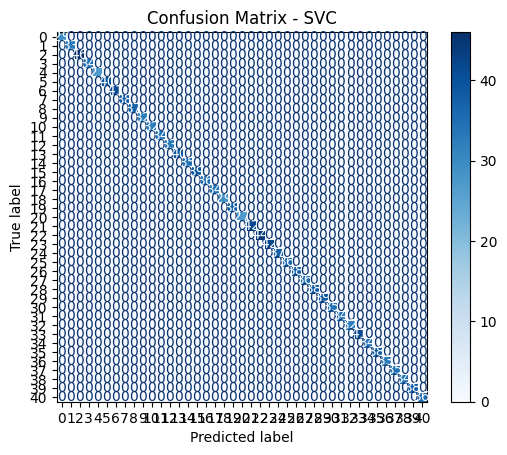


 For model: KN
 Accuracy:  1.0000
 Precision: 1.0000


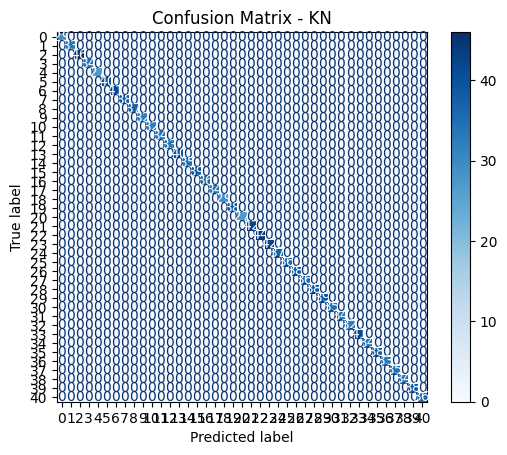


 For model: NB
 Accuracy:  1.0000
 Precision: 1.0000


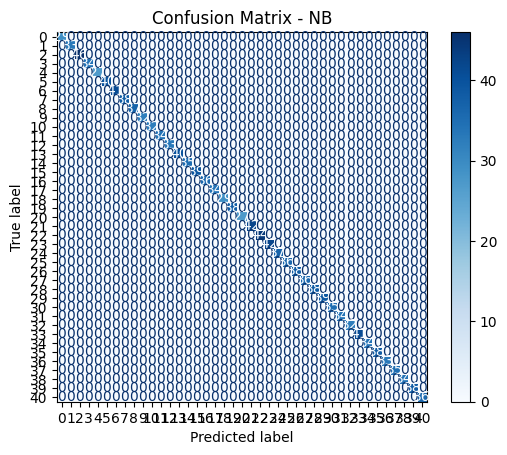

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



 For model: DT
 Accuracy:  0.1260
 Precision: 0.1095


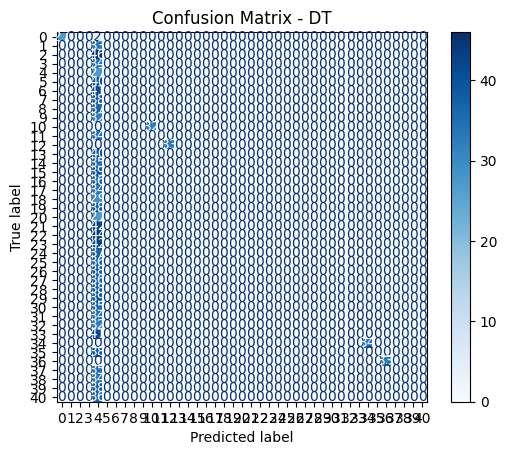


 For model: LR
 Accuracy:  1.0000
 Precision: 1.0000


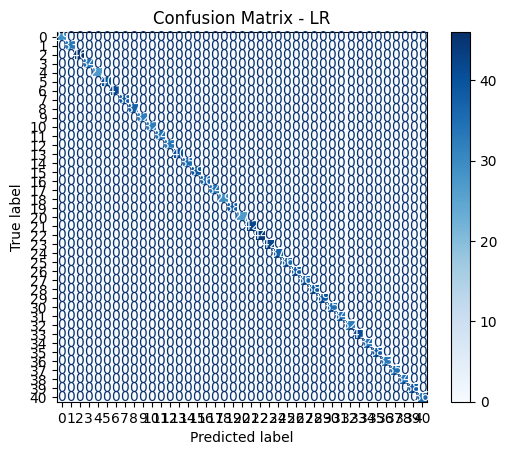


 For model: RF
 Accuracy:  1.0000
 Precision: 1.0000


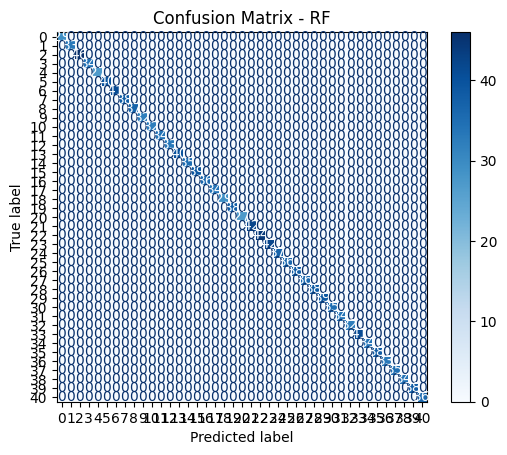

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



 For model: AdaBoost
 Accuracy:  0.0650
 Precision: 0.0360


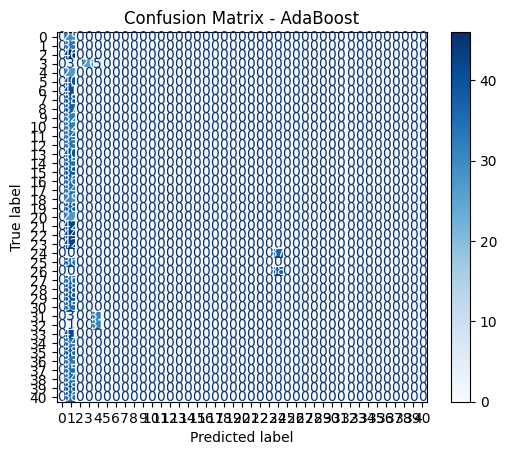


 For model: BgC
 Accuracy:  1.0000
 Precision: 1.0000


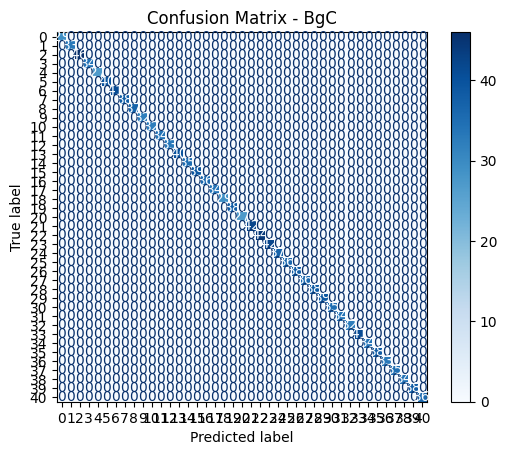


 For model: ETC
 Accuracy:  1.0000
 Precision: 1.0000


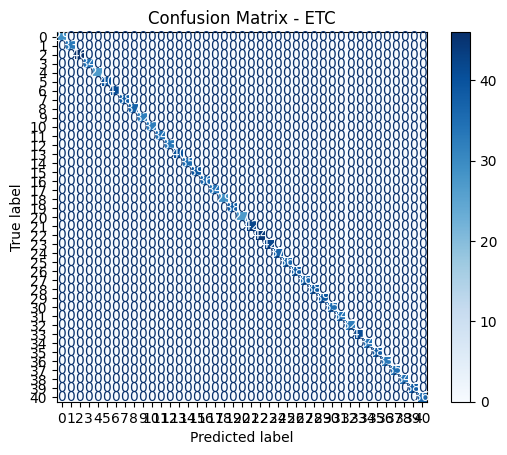


 For model: GBDT
 Accuracy:  1.0000
 Precision: 1.0000


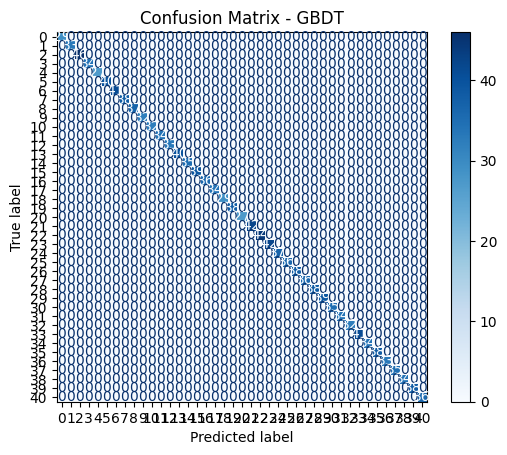


 For model: xgb
 Accuracy:  1.0000
 Precision: 1.0000


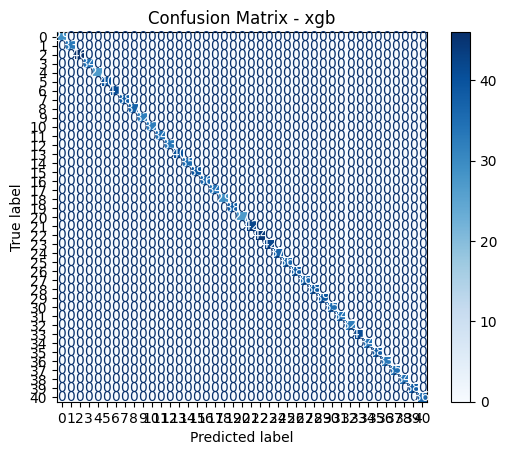

In [ ]:
import matplotlib.pyplot as plt

accuracy_scores = []
precision_scores = []
confusion_matrices = []

for name, clf in clfs.items():
    acc,prec,cm = train_classifier(clf, X_train,y_train,X_test,y_test)

    print(f"\n For model: {name}")
    print(f" Accuracy:  {acc:.4f}")
    print(f" Precision: {prec:.4f}")


    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Store metrics
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    confusion_matrices.append(cm)



In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,1.000000,1.000000
1,KN,1.000000,1.000000
2,NB,1.000000,1.000000
4,LR,1.000000,1.000000
5,RF,1.000000,1.000000
8,ETC,1.000000,1.000000
7,BgC,1.000000,1.000000
9,GBDT,1.000000,1.000000
10,xgb,1.000000,1.000000
3,DT,0.126016,0.109454


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

def cross_validate_classifier(clf, X, y, cv=5):

    # Accuracy scores
    accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

    # Precision scores (use a custom scorer for weighted precision)
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    precision_scores = cross_val_score(clf, X, y, cv=cv, scoring=precision_scorer)

    return accuracy_scores.mean(), precision_scores.mean()


In [ ]:
best_clfs = {
    'SVC' : svc,
    'RF': rfc
}
for name, clf in best_clfs.items():
    acc,prec= cross_validate_classifier(clf,X,y,cv = 5)

    print(f"\n For model: {name}")
    print(f" Accuracy:  {acc:.4f}")
    print(f" Precision: {prec:.4f}")



 For model: SVC
 Accuracy:  1.0000
 Precision: 1.0000

 For model: RF
 Accuracy:  1.0000
 Precision: 1.0000


In [ ]:
# SVC or RF can be taken as our model

# Prediction

In [ ]:
svc = SVC(kernel="linear")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [ ]:
import pickle
pickle.dump(svc,open('model.pkl','wb'))

In [ ]:
# prediction_test
print("Predicted label: ",svc.predict(X_test.iloc[0].values.reshape(1,-1))[0])
print("Actual label: ",y_test.iloc[0])

Predicted label:  30
Actual label:  30


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation

In [ ]:
precautions = pd.read_csv('precautions_df.csv')
diets = pd.read_csv('diets.csv')
workouts = pd.read_csv('workout_df.csv')
descriptions = pd.read_csv('description.csv')
medications = pd.read_csv('medications.csv')

In [ ]:
precautions.head(4)

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep


In [ ]:
diets.head(4)

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."


In [ ]:
workouts.head(4)

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet


In [ ]:
descriptions.head(4)

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...


In [ ]:
medications.head(4)

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."


In [ ]:
diseases_list= dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
diseases_list

{np.int64(0): '(vertigo) Paroymsal  Positional Vertigo',
 np.int64(1): 'AIDS',
 np.int64(2): 'Acne',
 np.int64(3): 'Alcoholic hepatitis',
 np.int64(4): 'Allergy',
 np.int64(5): 'Arthritis',
 np.int64(6): 'Bronchial Asthma',
 np.int64(7): 'Cervical spondylosis',
 np.int64(8): 'Chicken pox',
 np.int64(9): 'Chronic cholestasis',
 np.int64(10): 'Common Cold',
 np.int64(11): 'Dengue',
 np.int64(12): 'Diabetes ',
 np.int64(13): 'Dimorphic hemmorhoids(piles)',
 np.int64(14): 'Drug Reaction',
 np.int64(15): 'Fungal infection',
 np.int64(16): 'GERD',
 np.int64(17): 'Gastroenteritis',
 np.int64(18): 'Heart attack',
 np.int64(19): 'Hepatitis B',
 np.int64(20): 'Hepatitis C',
 np.int64(21): 'Hepatitis D',
 np.int64(22): 'Hepatitis E',
 np.int64(23): 'Hypertension ',
 np.int64(24): 'Hyperthyroidism',
 np.int64(25): 'Hypoglycemia',
 np.int64(26): 'Hypothyroidism',
 np.int64(27): 'Impetigo',
 np.int64(28): 'Jaundice',
 np.int64(29): 'Malaria',
 np.int64(30): 'Migraine',
 np.int64(31): 'Osteoarthristi

In [ ]:
type(diseases_list)

dict

In [ ]:
diseases_list[22]

'Hepatitis E'

In [ ]:
symptoms_dict = {col: idx for idx, col in enumerate(df.columns) if col != 'prognosis'}
symptoms_dict

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_ urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swelle

In [ ]:
def get_prediction(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for symptom in patient_symptoms:
        if symptom in symptoms_dict:
            input_vector[symptoms_dict[symptom]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
patient_symptoms = input("Enter the symptoms separated by commas: ").split(',')

Enter the symptoms separated by commas: itching,skin_rash


In [ ]:
patient_symptoms

['itching', 'skin_rash']

In [ ]:
patient_disease = get_prediction(patient_symptoms)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
patient_disease

'Fungal infection'

In [ ]:
def recommendations(patient_disease):
    precaution_info = precautions[precautions['Disease'] == patient_disease]
    if not precaution_info.empty:
        precaution_list = precaution_info.iloc[0, 2:].dropna().tolist()
        precaution_list = ', '.join(precaution_list)
    else:
        precaution_list = "No precaution info available"

    diet_info = diets[diets['Disease'] == patient_disease]
    if not diet_info.empty:
        diet_list = diet_info.iloc[0]['Diet']
        diet_list = ast.literal_eval(diet_list)
        diet_list = ', '.join(diet_list)
    else:
        diet_list = "No diet info available"

    workout_info = workouts[workouts['disease'] == patient_disease]
    if not workout_info.empty:
        workout_list = workout_info['workout'].dropna().tolist()
        workout_list = '\n'.join(workout_list)
    else:
        workout_list = "No workout recommendations available"

    description_info = descriptions[descriptions['Disease'] == patient_disease]
    if not description_info.empty:
        description_list = description_info.iloc[0]['Description']
    else:
        description_list = "No description info available"

    medication_info = medications[medications['Disease'] == patient_disease]
    if not medication_info.empty:
        medication_list = medication_info.iloc[0]['Medication']
        medication_list = ast.literal_eval(medication_list)
        medication_list = ', '.join(medication_list)
    else:
        medication_list = "No medication info available"

    return precaution_list, diet_list, workout_list, description_list, medication_list


In [ ]:
precaution_recommendations, diet_recommendations, workout_recommendations, description_recommendations, medication_recommendations = recommendations(patient_disease)

In [ ]:
print(precaution_recommendations)
print(diet_recommendations)
print(workout_recommendations)
print(description_recommendations)
print(medication_recommendations)

bath twice, use detol or neem in bathing water, keep infected area dry, use clean cloths
Antifungal Diet, Probiotics, Garlic, Coconut oil, Turmeric
Avoid sugary foods
Consume probiotics
Increase intake of garlic
Include yogurt in diet
Limit processed foods
Stay hydrated
Consume green tea
Eat foods rich in zinc
Include turmeric in diet
Eat fruits and vegetables
Fungal infection is a common skin condition caused by fungi.
Antifungal Cream, Fluconazole, Terbinafine, Clotrimazole, Ketoconazole


In [ ]:
model_data = {
    "encoder": encoder,
    "symptom_dict": symptoms_dict,
    "diseases_list": diseases_list,
}
pickle.dump(model_data, open('model_data.pkl', 'wb'))